Class work:

Calculate the derivative of $f(x)=exp(sin(2x))$
using both forward difference and central difference methods.

Analytically also calculate the derivative by hand.

Use this to find the absolute error in both forward difference and central difference at $x=0.5$. Vary $h$ from $0.1$ to $10^{-12}$.




In [1]:
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def difffd(f,x,h):
  fd = (f(x+h) - f(x))/h
  return fd
def diffcd(f,x,h):
  cd = (f(x+h/2) - f(x-h/2))/h
  return cd
x = 0.5
fp = fprime(x)
hr = [10**(-i) for i in range(1,13)]
fdr = [abs(difffd(f,x,h)-fp) for h in hr]
cdr = [abs(diffcd(f,x,h)-fp) for h in hr]
rowf = "{0:1.5e}  {1:1.16f} {2:1.16f}"
print(" h           abs error in fd           abs error in cd")
for h,fd,cd in zip(hr,fdr,cdr):
  print(rowf.format(h,fd,cd))

 h           abs error in fd           abs error in cd
1.00000e-01  0.3077044583376249 0.0134656094697734
1.00000e-02  0.0260359156900742 0.0001350472493096
1.00000e-03  0.0025550421497806 0.0000013505120728
1.00000e-04  0.0002550180941236 0.0000000135077878
1.00000e-05  0.0000254969542519 0.0000000001495843
1.00000e-06  0.0000025492660578 0.0000000002500959
1.00000e-07  0.0000002564334673 0.0000000011382744
1.00000e-08  0.0000000189018428 0.0000000189018428
1.00000e-09  0.0000003741732106 0.0000000699159992
1.00000e-10  0.0000021505300500 0.0000021505300500
1.00000e-11  0.0000332367747395 0.0000111721462455
1.00000e-12  0.0001220546167096 0.0001220546167096


1e-01 0.30770445833762494203256210 0.01346560946977337636099037
1e-02 0.02603591569007424055826050 0.00013504724930957223705263
1e-03 0.00255504214978063970420408 0.00000135051207283964913586
1e-04 0.00025501809412364906393123 0.00000001350778777720051949
1e-05 0.00002549695425191345066196 0.00000000014958434491063599
1e-06 0.00000254926605780525505907 0.00000000025009594395442036
1e-07 0.00000025643346734938177178 0.00000000113827436365454560
1e-08 0.00000001890184275765705024 0.00000001890184275765705024
1e-09 0.00000037417321063770714318 0.00000006991599921235547299
1e-10 0.00000215053005003795760786 0.00000215053005003795760786
1e-11 0.00003323677473954234073972 0.00001117214624546392087723
1e-12 0.00012205461670955486397361 0.00012205461670955486397361
1e-13 0.00234250066595986794482087 0.00209839143254075821687366
1e-14 0.02454696115846299875329350 0.02454696115846299875329350
1e-15 0.15777372411348178360412930 0.15777372411348178360412930


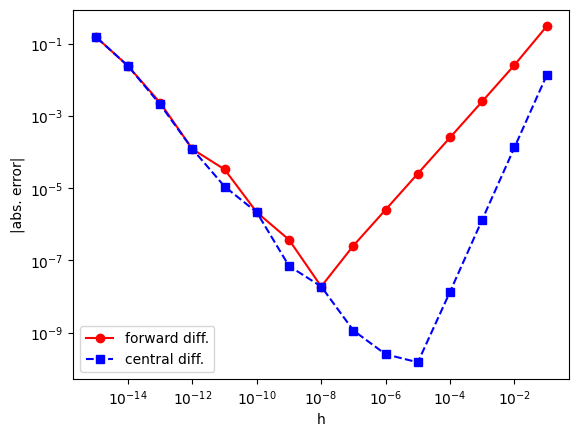

In [2]:
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def calc_fd(f,x,h):
 fd = (f(x+h) - f(x))/h
 return fd
def calc_cd(f,x,h):
 cd = (f(x+h/2) - f(x-h/2))/h
 return cd
x = 0.5
an = fprime(x)
def logplot(h,fd,cd):
    plt.xlabel('h')
    plt.ylabel('|abs. error|')
    plt.plot(h,fd,'r-o',label='forward diff.')
    plt.plot(h,cd,'b--s',label='central diff.')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
hs = [10**(-i) for i in range(1,16)]
fds = [abs(calc_fd(f,x,h) - an) for h in hs]
cds = [abs(calc_cd(f,x,h) - an) for h in hs]
rowf = "{0:1.0e} {1:1.26f} {2:1.26f}"
for h,fd,cd in zip(hs,fds,cds):
  print(rowf.format(h,fd,cd))
logplot(hs,fds,cds)

Use Richardson's extrapolation to find the derivative of $f(x)=e^{\sin(2x)}$ at $x=0.5$ and find the error for both forward and central difference. Plot the absolute error versus $10^{-8} < h < 10^{0}$.

h abs. err. rich fd abs. err. rich cd
h    abs. err. rich fd    abs. err. rich cd
1e-01 0.02596860598273842413163948 0.00000987283708742126009383
1e-02 0.00026957205000055495247580 0.00000000098986019381186452
1e-03 0.00000270054341822145715923 0.00000000000110977893541531
1e-04 0.00000002701091172951919361 0.00000000000436672920045567
1e-05 0.00000000033891378592443289 0.00000000002805133902938906
1e-06 0.00000000069418515380448298 0.00000000025009594395442036
1e-07 0.00000001002005856065579792 0.00000001070410471371019412


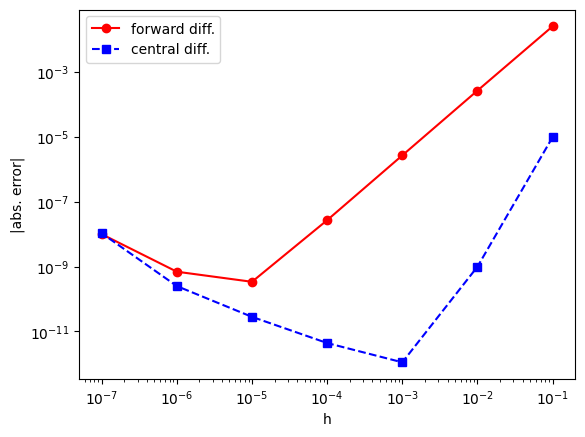

In [ ]:
#with Richardson extrapolation
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def difffd(f,x,h):
  fd = (f(x+h) - f(x))/h
  return fd
def diffcd(f,x,h):
  cd = (f(x+h/2) - f(x-h/2))/h
  return cd
def logplot(h,fd,cd):
  plt.xlabel('h')
  plt.ylabel('|abs. error|')
  plt.plot(h,fd,'r-o',label='forward diff.')
  plt.plot(h,cd,'b--s',label='central diff.')
  plt.xscale('log')
  plt.yscale('log')
  plt.legend()
  plt.show()
x = 0.5
an = fprime(x)
hs = [10**(-i) for i in range(1,7)]
rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
print("h abs. err. rich fd abs. err. rich cd")
hs = [10**(-i) for i in range(1,8)]
rowf = "{0:1.0e} {1:1.26f} {2:1.26f}"
print("h    abs. err. rich fd    abs. err. rich cd")
fds = [abs(2*difffd(f,x,h/2) - difffd(f,x,h)-an) for h in hs]
cds = [abs((4*diffcd(f,x,h/2) - diffcd(f,x,h))/3-an) for h in hs]
for h,fd,cd in zip(hs,fds,cds):
  print(rowf.format(h,fd,cd))
logplot(hs,fds,cds)

Without Richardson extrapolation, using the second forward and second central difference approximation find the derivative of $f(x)=e^{\sin(2x)}$ at $x=0.5$ and find the error for both forward and central difference. Plot the absolute error versus $10^{-8} < h < 10^{0}$.

h    abs. err. rich fd    abs. err. rich cd
1e-01 0.02596860598273398323954098 0.00000987283709363850903173
1e-02 0.00026957205000055495247580 0.00000000098980112994695446
1e-03 0.00000270054341822145715923 0.00000000000140598643838530
1e-04 0.00000002701091172951919361 0.00000000000140554234917545
1e-05 0.00000000033891378592443289 0.00000000007245981592518547
1e-06 0.00000000025009594395442036 0.00000000113827436365454560
1e-07 0.00000001002005856065579792 0.00000001662529403034795905


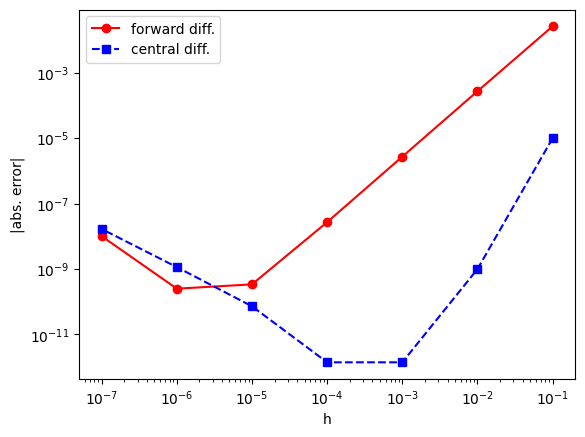

In [ ]:
#without Richardson extrapolation
from math import exp, sin, cos, log10
import matplotlib.pyplot as plt
def f(x):
 return exp(sin(2*x))
def fprime(x):
 return 2*exp(sin(2*x))*cos(2*x)
def difffd(f,x,h):
  fd = (4*f(x+(h/2)) - f(x+h)-3*f(x))/h
  return fd
def diffcd(f,x,h):
  cd = (8*f(x+h/4) + f(x-h/2)-f(x+h/2)-8*f(x-h/4))/(3*h)
  return cd
x = 0.5
fp = fprime(x)
def logplot(h,fd,cd):
    plt.xlabel('h')
    plt.ylabel('|abs. error|')
    plt.plot(h,fd,'r-o',label='forward diff.')
    plt.plot(h,cd,'b--s',label='central diff.')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
hs = [10**(-i) for i in range(1,8)]
rowf = "{0:1.0e} {1:1.26f} {2:1.26f}"
print("h    abs. err. rich fd    abs. err. rich cd")
fds = [abs(difffd(f,x,h)-fp) for h in hs]
cds = [abs(diffcd(f,x,h)-fp) for h in hs]
for h,fd,cd in zip(hs,fds,cds):
  print(rowf.format(h,fd,cd))
logplot(hs,fds,cds)

Use automatic differentiation to calculate derivative of $x^3$ at $x=4$. Use the Python module jax.

In [ ]:
import jax
import jax.numpy as jnp
def f(x):
    return x**3
print(f(4.0))
print(jax.grad(f)(4.0))

64.0
48.0
